# Step 1: Import helpful libraries

In [4]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [5]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


# Explore the  data
- Null Data
- Categorical data 
- Is there Text data 
- wich columns will we use 
- IS there outliers that can destory our algo 
- IS there diffrent range  of data 

# Null

In [3]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [4]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [21]:
# Check the structure of the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

# Convert Dtypes : 

In [26]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      300000 non-null  int64   
 1   cat0    300000 non-null  category
 2   cat1    300000 non-null  category
 3   cat2    300000 non-null  category
 4   cat3    300000 non-null  category
 5   cat4    300000 non-null  category
 6   cat5    300000 non-null  category
 7   cat6    300000 non-null  category
 8   cat7    300000 non-null  category
 9   cat8    300000 non-null  category
 10  cat9    300000 non-null  category
 11  cont0   300000 non-null  float64 
 12  cont1   300000 non-null  float64 
 13  cont2   300000 non-null  float64 
 14  cont3   300000 non-null  float64 
 15  cont4   300000 non-null  float64 
 16  cont5   300000 non-null  float64 
 17  cont6   300000 non-null  float64 
 18  cont7   300000 non-null  float64 
 19  cont8   300000 non-null  float64 
 20  cont9   300000 non-null  f

# Distribution of Target

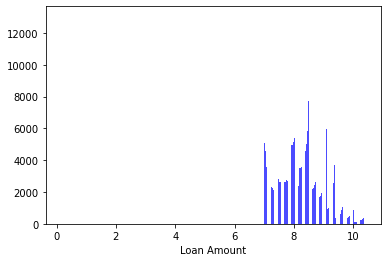

In [5]:
n, bins, patches = plt.hist(x=train['target'], bins='auto', color='blue',alpha=0.7, rwidth=0.5)
plt.xlabel("Loan Amount")
plt.show()

In [29]:
#Looking unique values
l=dict(train.nunique())
print(l)

{'id': 300000, 'cat0': 2, 'cat1': 2, 'cat2': 2, 'cat3': 4, 'cat4': 4, 'cat5': 4, 'cat6': 8, 'cat7': 8, 'cat8': 7, 'cat9': 15, 'cont0': 299632, 'cont1': 299727, 'cont2': 299738, 'cont3': 299407, 'cont4': 299702, 'cont5': 299760, 'cont6': 299737, 'cont7': 299710, 'cont8': 299713, 'cont9': 299684, 'cont10': 299616, 'cont11': 299727, 'cont12': 299657, 'cont13': 299705, 'target': 299613}


# Define the model features and target
## Extract X and y 

In [30]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

# Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [31]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

30000 rows in test set vs. 270000 in training set. 24 Features.


# What should we do for each colmun
## Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
## Cat Features 

In [32]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

## Num Features 

In [33]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

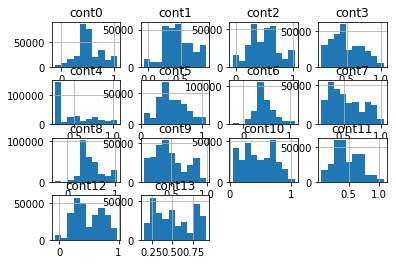

In [34]:
# Create a histogram
train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).hist()
plt.show()

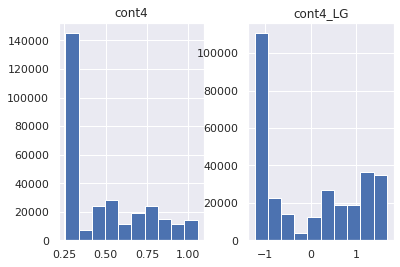

In [39]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
numdata=train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64'])
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(numdata[['cont4']])

# Apply the power transform to the data
numdata['cont4_LG'] = pow_trans.transform(numdata[['cont4']])

# Plot the data before and after the transformation
numdata[['cont4', 'cont4_LG']].hist()
plt.show()

In [35]:
print(cat_columns)
print(num_columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')
Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')


# check that we have all column

In [36]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(all_columns)

['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [37]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

Ok


# Preprocess Cat that occur rarely 
## What is high cardinality?

Almost all datasets now have categorical variables. Each categorical variable consists of unique values. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.
## The Curse of Dimensionality

Here is a simple summarization:

    As the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows EXPONENTIALLY.   
would like to use Yoshua Bengio’s (Yes the legendary Yoshua Bengio !) quora answer to explain this in more detail. I strongly advise reading the whole answer here. According to the answer, increasing the number of different values in a feature simply increases the total number of possible combinations that can be made using the input row (containing n such features). Say we have two features with two distinct values each, this gives us a total of 4 possible ways to combine the two features. Now if one of these had three distinct values we would have 3X2 =6 possible ways to combine them.

In classical non-parametric learning algorithms (e.g. nearest-neighbor, Gaussian kernel SVM, Gaussian kernel Gaussian Process, etc.) the model needs to see at least one example for each of these combinations (or at least as many as necessary to cover all the variations of configurations of interest), in order to produce a correct answer, one that is different from the target value required for other nearby configurations.

There is a workaround to this, that is the model even in the absence of a lot of training data can discern between configurations (not in the training set) for future predictions provided there is some sort of structure (pattern) in these combinations. In most cases, high cardinality makes it difficult for the model to identify such patterns and hence the model doesn’t generalise well to examples outside the training set.    
## Reducing Cardinality by using a simple Aggregating function

Below is a simple function I use to reduce the cardinality of a feature. The idea is very simple. Leave instances belonging to a value with high frequency as they are and replace the other instances with a new category which we will call other.

    Choose a threshold
    Sort unique values in the column by their frequency in descending order
    Keep adding the frequency of these sorted (descending) unique values until a threshold is reached.
    These are the unique categories we will keep and instances of all other categories shall be replaced by “other”.
Let’s run through a quick example before going through the code. Say our column colour has 100 values and our threshold is 90% (that is 90). We have 5 different categories of colours: Red (50), Blue(40), Yellow (5), Green (3) and Orange (2). The numbers within the bracket indicate how many instances of that category are present in the column.

We see that Red (50)+Blue (40) reaches our threshold of 90. In that case, we retain only 2 categories (Red, Blue) and mark all other instances of other colours as “Other”
Thus we have reduced cardinality from 5 to 3 (Red, Blue, Other)

Here is the utility function I wrote to facilitate this. It’s well commented and follows exactly what I described above so you won’t have a problem following along. We can set a custom threshold and the return_categories option optionally lets us see the list of all unique values after reducing cardinality.
    

In [38]:
# Create a series out of the Country column
cat6 = train.cat6

# Get the counts of each category
cat6_counts = cat6.value_counts()

# Print the count values for each category
print(cat6_counts)

A    290511
B      8018
C       928
D       292
I       136
H        56
E        45
G        14
Name: cat6, dtype: int64


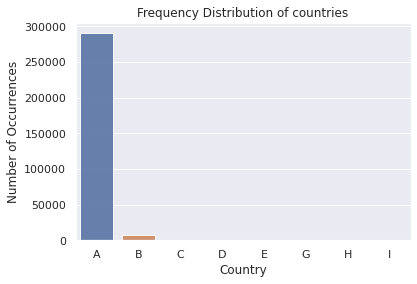

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.barplot(cat6_counts.index, cat6_counts.values, alpha=0.9)
plt.title('Frequency Distribution of countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

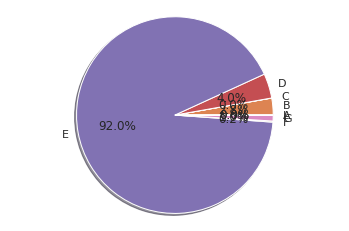

In [40]:
labels = train['cat7'].astype('category').cat.categories.tolist()
counts = train['cat7'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()



In [41]:
for col in cat_columns :
    cat_frenquency = (train[col].value_counts())/train.shape[0]
    botton_decile = cat_frenquency.quantile(q=0.05)
    print(col , cat_frenquency,botton_decile )   

cat0 A    0.643767
B    0.356233
Name: cat0, dtype: float64 0.37061
cat1 A    0.51608
B    0.48392
Name: cat1, dtype: float64 0.485528
cat2 A    0.846287
B    0.153713
Name: cat2, dtype: float64 0.188342
cat3 C    0.877853
A    0.105753
D    0.014427
B    0.001967
Name: cat3, dtype: float64 0.003835666666666667
cat4 B    0.982457
A    0.009927
C    0.005907
D    0.001710
Name: cat4, dtype: float64 0.0023395
cat5 B    0.497800
D    0.420457
C    0.067493
A    0.014250
Name: cat5, dtype: float64 0.0222365
cat6 A    0.968370
B    0.026727
C    0.003093
D    0.000973
I    0.000453
H    0.000187
E    0.000150
G    0.000047
Name: cat6, dtype: float64 8.283333333333333e-05
cat7 E    0.920133
D    0.040480
B    0.027657
G    0.009567
F    0.001873
C    0.000120
A    0.000103
I    0.000067
Name: cat7, dtype: float64 7.95e-05
cat8 C    0.370343
E    0.266147
A    0.255283
G    0.087093
D    0.017290
F    0.003220
B    0.000623
Name: cat8, dtype: float64 0.0014023333333333336
cat9 F    0.237497
I

In [65]:
def condense_category(col, min_freq=0.05, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))
train_condense=train.copy()
train_condense[cat_columns]=train_condense[cat_columns].apply(condense_category, axis=0)

In [66]:
train_condense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

# Convert Ddtype

In [67]:
train_condense[train_condense.select_dtypes(['float64']).columns] = train_condense[train_condense.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train_condense[train_condense.select_dtypes(['object']).columns] = train_condense.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [69]:
train_condense.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,other,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,other,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [68]:
train_condense.dtypes

id           int64
cat0      category
cat1      category
cat2      category
cat3      category
cat4      category
cat5      category
cat6      category
cat7      category
cat8      category
cat9      category
cont0      float64
cont1      float64
cont2      float64
cont3      float64
cont4      float64
cont5      float64
cont6      float64
cont7      float64
cont8      float64
cont9      float64
cont10     float64
cont11     float64
cont12     float64
cont13     float64
target     float64
dtype: object

In [70]:
for col in cat_columns :
    cat_frenquency = (train_condense[col].value_counts())
    botton_decile = cat_frenquency.quantile(q=0.05)
    print(col , cat_frenquency,botton_decile )   

cat0 A    193130
B    106870
Name: cat0, dtype: int64 111183.0
cat1 A    154824
B    145176
Name: cat1, dtype: int64 145658.4
cat2 A    253886
B     46114
Name: cat2, dtype: int64 56502.6
cat3 C        263356
A         31726
other      4918
Name: cat3, dtype: int64 7598.8
cat4 B        294737
other      5263
Name: cat4, dtype: int64 19736.7
cat5 B        149340
D        126137
C         20248
other      4275
Name: cat5, dtype: int64 6670.950000000001
cat6 A        290511
other      9489
Name: cat6, dtype: int64 23540.1
cat7 E        276040
other     23960
Name: cat7, dtype: int64 36564.0
cat8 C        111103
E         79844
A         76585
G         26128
other      6340
Name: cat8, dtype: int64 10297.6
cat9 F        71249
other    65636
I        59218
G        28253
L        20958
H        19925
K        18057
N        16704
Name: cat9, dtype: int64 17177.55


In [71]:
# Create a series out of the Country column
cat6 = train_condense.cat6

# Get the counts of each category
cat6_counts = cat6.value_counts()

# Print the count values for each category
print(cat6_counts)

A        290511
other      9489
Name: cat6, dtype: int64


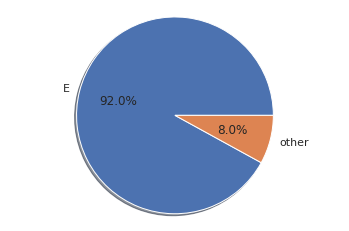

In [72]:
labels = train_condense['cat7'].astype('category').cat.categories.tolist()
counts = train_condense['cat7'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


# X and Y for data Condense 

In [73]:
# Create arrays for the features and the response variable
y_condense = train_condense['target'].to_numpy()
X_condense = train_condense.drop(['id','target'], axis=1)
# Split the dataset and labels into training and test sets
X_train_condense , X_test_condense , y_train_condense , y_test_condense  = train_test_split(X_condense , y_condense , test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test_condense.shape[0], X_train_condense.shape[0], X_test_condense.shape[1]))

30000 rows in test set vs. 270000 in training set. 24 Features.


# Removing redundant features
## Selecting relevant features

<AxesSubplot:>

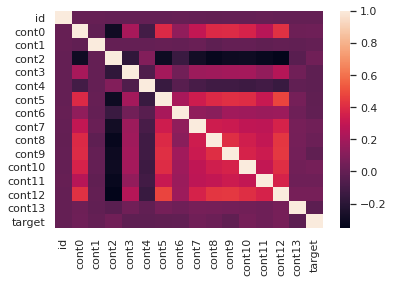

In [28]:
import seaborn as sns 
warnings.filterwarnings("ignore")

sns.heatmap(train.corr())

# Create complexe transformer  in order to  put all transformations in the same pipe 
    'num_columns' :Cleaning->Valeur Manquante -> Standar_Scaler
    'cat_columns' : Cleaning -> Valeur Manquante -> Categorique [One Hot]


    fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
        StandardScaler()
    )

    "Write a pattern to extract numbers and decimals"
    def return_number(string):
        pattern = re.compile(r"\d+\.\d+")
        # Search the text for matches
        number = re.match(pattern, string)
        # If a value is returned, use group(0) to return the found value
        if number is not None:
            return float(number.group(0))

    extraire_number_then_imput_then_scale = make_pipeline(
        FunctionTransformer(extract_number),
        fill_missing_then_Standar_scaler,
    )    


# Pipe Cat 

In [91]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_encoder1 = make_pipeline(
    SimpleImputer(strategy='most_frequent', add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_one_hot_LabelEncoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    LabelEncoder()
)
fill_missing_then_OrdinalEncoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OrdinalEncoder()
)

## Num Features :

In [75]:
fill_missing_then_StandardScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)
fill_missing_then_RobustScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    RobustScaler()
)
fill_missing_then_MinMaxScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
)
fill_missing_then_Outlier_MinMax = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    MinMaxScaler()
) 

# Compose num+cat : ColumnTransformer
## First Standar preprocess

In [76]:
data_preprocess = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_RobustScaler, num_columns)
)

# Check


In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270000 entries, 276481 to 117952
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   cat0    270000 non-null  category
 1   cat1    270000 non-null  category
 2   cat2    270000 non-null  category
 3   cat3    270000 non-null  category
 4   cat4    270000 non-null  category
 5   cat5    270000 non-null  category
 6   cat6    270000 non-null  category
 7   cat7    270000 non-null  category
 8   cat8    270000 non-null  category
 9   cat9    270000 non-null  category
 10  cont0   270000 non-null  float64 
 11  cont1   270000 non-null  float64 
 12  cont2   270000 non-null  float64 
 13  cont3   270000 non-null  float64 
 14  cont4   270000 non-null  float64 
 15  cont5   270000 non-null  float64 
 16  cont6   270000 non-null  float64 
 17  cont7   270000 non-null  float64 
 18  cont8   270000 non-null  float64 
 19  cont9   270000 non-null  float64 
 20  cont10  270000 non-nu

In [78]:
data_preprocess.fit(X_train)
data_preprocess.transform(X_train)
data_preprocess.transform(X_test)
print("Ok , Every thing is well ")

Ok , Every thing is well 


# Find Best Pipe
## Step 1: Cross-Validation

In [64]:
cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)

cross_validation_design

KFold(n_splits=5, random_state=77, shuffle=True)

# Train RandomForest / Xgboost 
## XGBR on train normal data 

In [48]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR_MODEL = {}
# Définir la pipeline
XGBR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('XGBR', XGBR)
                                  ])

# Définir la grille
XGBR_MODEL['hyperparams'] = {}
XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [100,200]
#XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.7, 0.8]
#XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [5,7,15]
#XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [1.1, 1.2 ]
#XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [1.1, 1.2, 1.3]
#XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7, 0.8, 0.9]
# Effectuer la GridSearch
XGBR_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR_MODEL['pipeline'],
    param_grid=XGBR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    )
#Define SVR classifier
XGBR_MODEL['gridsearch'].fit(X_train, y_train)
XGBR_accuracy = XGBR_MODEL['gridsearch'].score(X_test, y_test)
print('SXGBR Accuracy : ', XGBR_accuracy)

SXGBR Accuracy :  -0.7270350202679265


In [56]:
XGBR_MODEL['gridsearch'].cv_results_

{'mean_fit_time': array([ 63.06460562, 123.25942745]),
 'std_fit_time': array([0.17506007, 0.23117977]),
 'mean_score_time': array([0.26180062, 0.31093483]),
 'std_score_time': array([0.00198967, 0.00322896]),
 'param_XGBR__n_estimators': masked_array(data=[100, 200],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'XGBR__n_estimators': 100}, {'XGBR__n_estimators': 200}],
 'split0_test_score': array([-0.72566469, -0.7278639 ]),
 'split1_test_score': array([-0.72392585, -0.72601657]),
 'split2_test_score': array([-0.72445466, -0.72632283]),
 'split3_test_score': array([-0.72615558, -0.72789767]),
 'split4_test_score': array([-0.72412638, -0.72572084]),
 'mean_test_score': array([-0.72486543, -0.72676436]),
 'std_test_score': array([0.00088329, 0.00093128]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [57]:
XGBR_MODEL['gridsearch'].best_params_

{'XGBR__n_estimators': 100}

{'XGBR__n_estimators': 100}

In [53]:
# Define the model 
randomForestmodel=Pipeline([('data_process', data_preprocess),
                            ('RF', RandomForestRegressor(random_state=1))])
# Train the model (will take about 10 minutes to run)
randomForestmodel.fit(X_train, y_train)
preds_valid = randomForestmodel.predict(X_test)
print(mean_squared_error(y_test, preds_valid, squared=False))

0.7377224281297019


## Train on condense data 

In [79]:
X_train_condense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270000 entries, 276481 to 117952
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   cat0    270000 non-null  category
 1   cat1    270000 non-null  category
 2   cat2    270000 non-null  category
 3   cat3    270000 non-null  category
 4   cat4    270000 non-null  category
 5   cat5    270000 non-null  category
 6   cat6    270000 non-null  category
 7   cat7    270000 non-null  category
 8   cat8    270000 non-null  category
 9   cat9    270000 non-null  category
 10  cont0   270000 non-null  float64 
 11  cont1   270000 non-null  float64 
 12  cont2   270000 non-null  float64 
 13  cont3   270000 non-null  float64 
 14  cont4   270000 non-null  float64 
 15  cont5   270000 non-null  float64 
 16  cont6   270000 non-null  float64 
 17  cont7   270000 non-null  float64 
 18  cont8   270000 non-null  float64 
 19  cont9   270000 non-null  float64 
 20  cont10  270000 non-nu

In [80]:
data_preprocess.fit(X_train_condense)
data_preprocess.transform(X_train_condense)
data_preprocess.transform(X_test_condense)
print("Ok , Every thing is well ")

Ok , Every thing is well 


In [81]:
RFR_MODEL = {}
# Définir la pipeline
RFR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('RFR', RandomForestRegressor(random_state=1))
                                  ])

# Définir la grille
RFR_MODEL['hyperparams'] = {}
#RFR_MODEL['hyperparams']['RFR__n_estimators'] = [100,200]
#RFR_MODEL['hyperparams']['RFR__colsample_bytree'] = [0.7, 0.8]
#RFR_MODEL['hyperparams']['RFR__max_depth'] = [5,7,15]
#RFR_MODEL['hyperparams']['RFR__reg_alpha'] = [1.1, 1.2 ]
#RFR_MODEL['hyperparams']['RFR__reg_lambda'] = [1.1, 1.2, 1.3]
#RFR_MODEL['hyperparams']['RFR__subsample'] = [0.7, 0.8, 0.9]
# Effectuer la GridSearch
RFR_MODEL['gridsearch'] = GridSearchCV(
    estimator=RFR_MODEL['pipeline'],
    param_grid=RFR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    )
#Define RFR classifier
RFR_MODEL['gridsearch'].fit(X_train_condense, y_train_condense)
RFR_accuracy =RFR_MODEL['gridsearch'].score(X_test_condense, y_test_condense)
print('RFR Accuracy : ', RFR_accuracy)

RFR Accuracy :  -0.7377671192270493


In [83]:
RFR_MODEL['gridsearch'].cv_results_

{'mean_fit_time': array([668.9409965]),
 'std_fit_time': array([8.43065348]),
 'mean_score_time': array([3.90164123]),
 'std_score_time': array([0.20143278]),
 'params': [{}],
 'split0_test_score': array([-0.73644062]),
 'split1_test_score': array([-0.73334678]),
 'split2_test_score': array([-0.73443743]),
 'split3_test_score': array([-0.73636466]),
 'split4_test_score': array([-0.73366362]),
 'mean_test_score': array([-0.73485062]),
 'std_test_score': array([0.00131618]),
 'rank_test_score': array([1], dtype=int32)}

In [84]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(n_estimators= 100)
XGBR_MODEL = {}
# Définir la pipeline
XGBR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('XGBR', XGBR)
                                  ])

# Définir la grille
XGBR_MODEL['hyperparams'] = {}
#XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [100,200]
#XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.7, 0.8]
#XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [5,7,15]
#XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [1.1, 1.2 ]
#XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [1.1, 1.2, 1.3]
#XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7, 0.8, 0.9]
# Effectuer la GridSearch
XGBR_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR_MODEL['pipeline'],
    param_grid=XGBR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    )
#Define SVR classifier
XGBR_MODEL['gridsearch'].fit(X_train_condense, y_train_condense)
XGBR_accuracy = XGBR_MODEL['gridsearch'].score(X_test_condense, y_test_condense)
print('SXGBR Accuracy : ', XGBR_accuracy)

SXGBR Accuracy :  -0.7264753922697453


In [85]:
XGBR_MODEL['gridsearch'].cv_results_

{'mean_fit_time': array([55.42438083]),
 'std_fit_time': array([0.3081569]),
 'mean_score_time': array([0.23180151]),
 'std_score_time': array([0.00164448]),
 'params': [{}],
 'split0_test_score': array([-0.72577067]),
 'split1_test_score': array([-0.72349355]),
 'split2_test_score': array([-0.72459859]),
 'split3_test_score': array([-0.72552187]),
 'split4_test_score': array([-0.72386144]),
 'mean_test_score': array([-0.72464922]),
 'std_test_score': array([0.00089195]),
 'rank_test_score': array([1], dtype=int32)}

# Train on condense2 

In [87]:
def condense_category(col, min_freq=0.1, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))
train_condense2=train.copy()
train_condense2[cat_columns]=train_condense2[cat_columns].apply(condense_category, axis=0)
train_condense2[train_condense2.select_dtypes(['float64']).columns] = train_condense2[train_condense2.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train_condense[train_condense2.select_dtypes(['object']).columns] = train_condense2.select_dtypes(['object']).apply(lambda x: x.astype('category'))
# Create arrays for the features and the response variable
y_condense2 = train_condense2['target'].to_numpy()
X_condense2 = train_condense2.drop(['id','target'], axis=1)
# Split the dataset and labels into training and test sets
X_train_condense2 , X_test_condense2 , y_train_condense2 , y_test_condense2  = train_test_split(X_condense2 , y_condense2 , test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test_condense2.shape[0], X_train_condense2.shape[0], X_test_condense2.shape[1]))

30000 rows in test set vs. 270000 in training set. 24 Features.


In [88]:
X_train_condense2.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
276481,A,B,A,C,B,other,other,E,E,F,...,0.889253,0.494761,0.613863,0.708834,0.548014,0.321308,0.286040,0.663483,0.423789,0.264511
297093,B,A,B,C,B,other,A,E,C,F,...,0.896394,0.674308,0.393346,0.617894,0.418062,0.597744,0.736224,0.584338,0.273255,0.260882
257137,A,B,B,C,B,B,A,E,E,other,...,0.458592,0.247413,0.179286,0.501181,0.274230,0.389499,0.365823,0.625327,0.657805,0.464079
267785,A,B,B,C,B,B,A,E,A,other,...,0.513907,0.588984,0.359562,0.380042,0.703066,0.378986,0.287778,0.380397,0.529498,0.274086
31098,A,B,A,C,B,B,A,E,C,I,...,0.277507,0.047176,0.508692,0.304767,0.262476,0.287057,0.447125,0.294946,0.307148,0.816095


In [89]:
from xgboost import XGBRegressor
XGBR2 = XGBRegressor(n_estimators= 100)
XGBR2_MODEL = {}
# Définir la pipeline
XGBR2_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('XGBR', XGBR2)
                                  ])

# Définir la grille
XGBR2_MODEL['hyperparams'] = {}
#XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [100,200]
#XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.7, 0.8]
#XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [5,7,15]
#XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [1.1, 1.2 ]
#XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [1.1, 1.2, 1.3]
#XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7, 0.8, 0.9]
# Effectuer la GridSearch
XGBR2_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR2_MODEL['pipeline'],
    param_grid=XGBR2_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='neg_root_mean_squared_error'
    )
#Define SVR classifier
XGBR2_MODEL['gridsearch'].fit(X_train_condense2, y_train_condense2)
XGBR2_accuracy = XGBR2_MODEL['gridsearch'].score(X_test_condense2, y_test_condense2)
print('SXGBR Accuracy : ', XGBR2_accuracy)

SXGBR Accuracy :  -0.7261980534512752


In [90]:
XGBR2_MODEL['gridsearch'].cv_results_

{'mean_fit_time': array([53.08497438]),
 'std_fit_time': array([0.37933158]),
 'mean_score_time': array([0.22838159]),
 'std_score_time': array([0.00524214]),
 'params': [{}],
 'split0_test_score': array([-0.72572829]),
 'split1_test_score': array([-0.72416638]),
 'split2_test_score': array([-0.72427243]),
 'split3_test_score': array([-0.72604988]),
 'split4_test_score': array([-0.72382455]),
 'mean_test_score': array([-0.72480831]),
 'std_test_score': array([0.00090054]),
 'rank_test_score': array([1], dtype=int32)}

# Accelerate learing with GPU 

In [ ]:
!nvidia-smi

The only change we need to make is to set TREE_METHOD = 'gpu_hist' when initializing Xgboost

In [ ]:
%%time 
folds = 3
param_comb = 1

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02, 0.05]    
        }

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=6, tree_method='gpu_hist', eval_metric='auc')

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
test_num= test.select_dtypes(include=['int64','float64']).drop(['id'], axis=1).to_numpy()
# Use the model to generate predictions
test_num_scaled =ss.fit_transform(test_num) 
predictions = knn_without_cat_final.predict(test_num_scaled)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,
                       'target': predictions})
output.to_csv('submission1.csv', index=False)

In [ ]:
output

# Feature engineering

##  What is feature engineering?

Feature engineering is the creation of new features based on existing features, and it adds information to your dataset that is useful in some way: it adds features useful for your prediction or clustering task, or it sheds insight into relationships between features. Real world data is often not neat and tidy, and in addition to preprocessing steps like standardization, you'll likely have to extract and expand information that exists in the columns in your dataset. Feature engineering is a subject that could definitely be given its own entire course, so we're just going to go over some basics

# To be contiuned next notebook  to add add cat features 

#  Encoding categorical variables - one-hot/Label encoder 

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
# List of categorical columns
cat_columns = train.select_dtypes(exclude=['int64','float64']).columns

# ordinal-encode categorical columns
#X = features.copy()
#X_test = test.copy()
# ordinal_encoder = OrdinalEncoder()
X[object_cols] = le.fit_transform(features[object_cols])
X_test[object_cols] = ordinal_encoder.transform(test[object_cols])

# Preview the ordinal-encoded features
X.head()

https://github.com/scikit-learn-contrib/category_encoders

In [ ]:
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
df_results = pd.DataFrame(columns=['encoder', 'f1', 'accuracy', 'roc'])

for key in encoders:

    categorical_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', encoders[key]())
        ]
    )    

    numeric_transformer = Pipeline(
        steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', numeric_transformer, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ]
    )

    pipe = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', selected_model)
        ]
    )

    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    row = {
        'encoder': key,
        'f1': f1_score(y_test, y_pred, average='macro'),
        'accuracy': accuracy_score(y_test, y_pred),
        'roc': roc_auc_score(y_test, y_pred)
    }

df_results = df_results.append(row, ignore_index=True)

In [ ]:
df_results.head(20).sort_values(by='roc')


In [ ]:
model = GradientBoostingRegressor(learning_rate=0.025, n_estimators=1000, subsample=0.25, max_depth=5,\
                                 min_samples_split=50, max_features='sqrt')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print(f'R-squared: {r2_score(y_train, y_train_pred)}')
print(f'RMSLE: {np.sqrt(mean_squared_log_error(y_train, y_train_pred))}')

In [ ]:
from sklearn import set_config

set_config(display='diagram')
clf

# Select Best Model and retrain on all data 

In [ ]:
data_cleaning = make_column_transformer(
    ( OneHotEncoder(), colonnes_catégoriques ),
    ( fill_missing_then_one_hot_encoder , colonnes_catégoriques_avec_valeurs_manquantes),
    ( SimpleImputer(strategy='mean'), colonnes_numériques_avec_valeurs_manquantes),
    ( CountVectorizer(), 'Name'),
    ( extraire_lettre_cabine, 'Cabin'),
    ( 'drop' , drop_colonnes),
    ( 'passthrough' , passthrough_colonnes)
)

model_final = Pipeline([('data_cleaning', data_cleaning),
                        ('rf', RandomForest(random_state=7,
                                            max_depth=10,
                                            max_features=0.25,
                                            n_estimators=150))
                        ])


# on fit la meilleur pipe sur toute nos données de train
model_final.fit(X, Y)